In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [41]:
#色無し「１」、赤「２」、青「３」、黒「４」それぞれの数 計50
A = np.array([[4, 5, 1, 0], [4, 6, 0, 0], [5, 4, 1, 0], [6, 4, 0, 0], [0, 8, 0, 2], [1, 7, 0, 2], [4, 3, 3, 0], [2, 4, 2, 2], [0, 9, 1, 0], [5, 5, 0, 0], [4, 6, 0, 0], [4, 2, 4, 0], [2, 4, 2, 2], [4, 6, 0, 0], [4, 2, 2, 2], [4, 3, 3, 0], [5, 4, 1, 0], [5, 4, 1, 0], [4, 4, 0, 2], [2, 8, 0, 0], [3, 7, 0, 0], [6, 3, 0, 1], [4, 2, 2, 2], [5, 2, 1, 2], [3, 7, 0, 0], [1, 5, 2, 2], [2, 6, 2, 0], [5, 4, 0, 1], [6, 4, 0, 0], [5, 3, 2, 0], [3, 4, 2, 1], [5, 3, 2, 0], [7, 2, 1, 0], [4, 4, 0, 2], [3, 3, 2, 2], [4, 6, 0, 0], [5, 3, 0, 2], [5, 4, 0, 1], [7, 3, 0, 0], [7, 2, 0, 1], [6, 2, 0, 2], [5, 3, 2, 0], [3, 4, 2, 1], [6, 4, 0, 0], [2, 3, 3, 2], [3, 5, 2, 0], [5, 2, 1, 2], [6, 4, 0, 0], [7, 1, 0, 2], [6, 4, 0, 0], ], dtype=float)

#色無し「１」、赤「２」、青「３」、黒「４」
B = np.array([1, 3, 1, 2, 1, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 4, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 2, 1, 2, 4, 2, 2, 2, 2, 3, 3, 1, 2, 2, 1, 1, 4, 2, 4, 1, 3, 3, 4])

K = 4
N = 50
T4 = np.zeros((N, 4), dtype=np.uint8)
X = np.zeros((N, 2))
for i in range(50):
    if B[i] == 1:
        T4[i] = [1, 0, 0, 0]
    elif B[i] == 2:
        T4[i] = [0, 1, 0, 0]
    elif B[i] == 3:
        T4[i] = [0, 0, 1, 0]
    elif B[i] == 4:
        T4[i] = [0, 0, 0, 1]

In [42]:
#視覚化用
Rx = np.random.rand(50, 4) / 2 - 0.25
Ax = A + Rx

In [43]:
def Easy_to_read_graph(col1, col2):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(Ax[i][col1], Ax[i][col2], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(Ax[i][col1], Ax[i][col2], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(Ax[i][col1], Ax[i][col2], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(Ax[i][col1], Ax[i][col2], linestyle='none', markeredgecolor='white', marker='o', color='black')
    plt.grid(True)
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)
    
def Easy_to_read_graph_two(cols1_1, cols1_2, cols2_1, cols2_2):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(Ax[i][cols1_1]+Ax[i][cols1_2], Ax[i][cols2_1]+Ax[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(Ax[i][cols1_1]+Ax[i][cols1_2], Ax[i][cols2_1]+Ax[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(Ax[i][cols1_1]+Ax[i][cols1_2], Ax[i][cols2_1]+Ax[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(Ax[i][cols1_1]+Ax[i][cols1_2], Ax[i][cols2_1]+Ax[i][cols2_2], linestyle='none', markeredgecolor='white', marker='o', color='black')
    plt.grid(True)
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)
    
def Easy_to_read_graph_two_moto(cols1_1, cols1_2, cols2_1, cols2_2):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(A[i][cols1_1]+A[i][cols1_2], A[i][cols2_1]+A[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(A[i][cols1_1]+A[i][cols1_2], A[i][cols2_1]+A[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(A[i][cols1_1]+A[i][cols1_2], A[i][cols2_1]+A[i][cols2_2], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(A[i][cols1_1]+A[i][cols1_2], A[i][cols2_1]+A[i][cols2_2], linestyle='none', markeredgecolor='white', marker='o', color='black')
    plt.grid(True)
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)

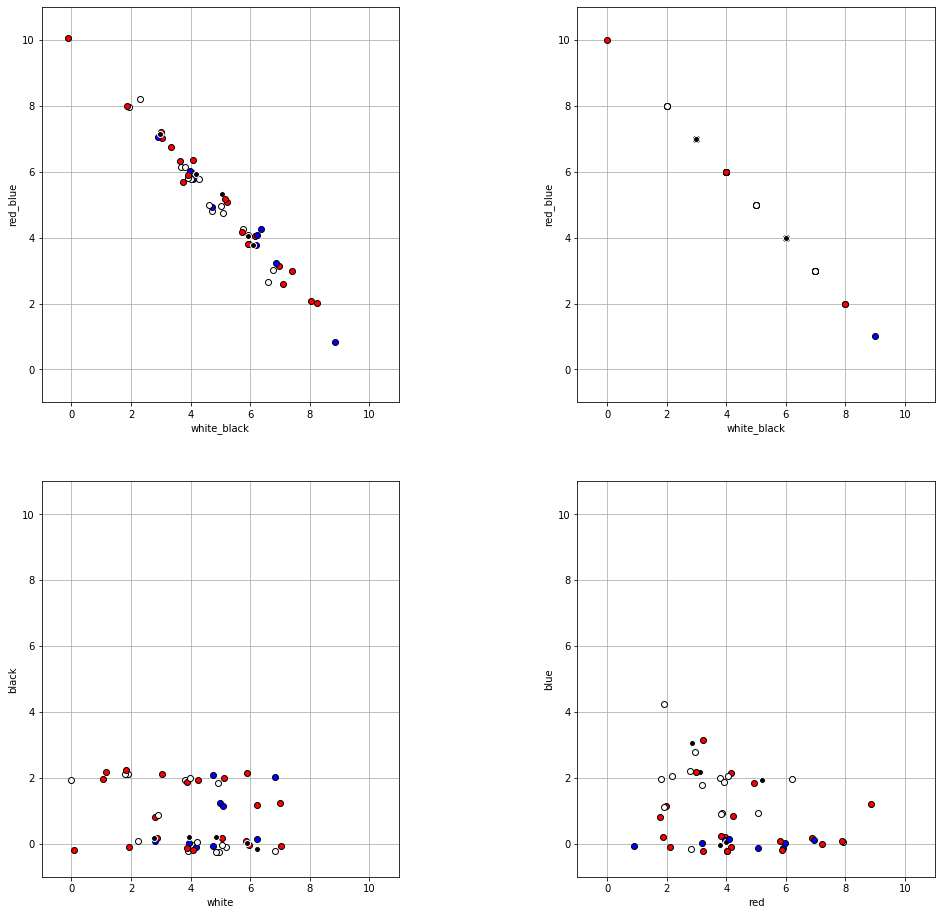

In [44]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5)
#白「0」、赤「1」、青「2」、黒「3」

plt.subplot(2, 2, 1)
#白黒　対　赤青
Easy_to_read_graph_two(0, 3, 1, 2)
plt.xlabel('white_black')
plt.ylabel('red_blue')

plt.subplot(2, 2, 2)
#白黒　対　赤青　の元画
Easy_to_read_graph_two_moto(0, 3, 1, 2)
plt.xlabel('white_black')
plt.ylabel('red_blue')

plt.subplot(2, 2, 3)
#白　対　黒
Easy_to_read_graph(0, 3)
plt.xlabel('white')
plt.ylabel('black')

plt.subplot(2, 2, 4)
#赤　対　青
Easy_to_read_graph(1, 2)
plt.xlabel('red')
plt.ylabel('blue')

plt.show()

In [45]:
def logistic4(x0, x1, w):
    K = 4
    w = w.reshape((4, 3))   #wのデータを(4,3)の行列に変更
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y

In [46]:
def cee_logistic4(w, x, t):
    X_n = x.shape[0]
    y = logistic4(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

In [47]:
def dcee_logistic4(w, x, t):
    X_n = x.shape[0]
    y = logistic4(x[:, 0], x[:, 1], w)
    dcee = np.zeros((4, 3))  # ( クラスの数 K) x (x の次元 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

In [48]:
def ﬁt_logistic4(w_init, x, t):
    res = minimize(cee_logistic4, w_init, args=(x, t),
                   jac=dcee_logistic4, method="CG")
    return res.x

In [49]:
def show_contour_logistic4(w):
    x0 = np.linspace(-1, 11, 60)
    x1 = np.linspace(-1, 11, 60)
    
    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((60, 60, 3))
    for i in range(60):
        wk = logistic4(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                             colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f')
    plt.grid(True)

In [50]:
def color_pattern(x, y):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(A[i][x], A[i][y], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(A[i][x], A[i][y], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(A[i][x], A[i][y], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(A[i][x], A[i][y], linestyle='none', markeredgecolor='white', marker='o', color='black')
    
    plt.xlim(-1, 11)
    plt.ylim(-1, 11)
    
def colors_pattern(x0, x1, y0, y1):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(A[i][x0]+A[i][x1], A[i][y0]+A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(A[i][x0]+A[i][x1], A[i][y0]+A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(A[i][x0]+A[i][x1], A[i][y0]+A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(A[i][x0]+A[i][x1], A[i][y0]+A[i][y1], linestyle='none', markeredgecolor='white', marker='o', color='black')

In [51]:
def X_mans(col1_1, col1_2, col2_1, col2_2):
    for i in range(50):
        X[i][0] = A[i][col1_1]+A[i][col1_2]
        X[i][1] = A[i][col2_1]+A[i][col2_2]
    W_init = np.zeros((4, 3))
    W = fit_logistic4(W_init, X, T4)
    print(np.round(W.reshape((4, 3)),2))
    cee = cee_logistic4(W, X, T4)
    print("CEE = {0:.2f}".format(cee))

def X_man(col1, col2):
    for i in range(50):
        X[i][0] = A[i][col1]
        X[i][1] = A[i][col2]
    W_init = np.zeros((4, 3))
    W = fit_logistic4(W_init, X, T4)
    print(np.round(W.reshape((4, 3)),2))
    cee = cee_logistic4(W, X, T4)
    print("CEE = {0:.2f}".format(cee))

[[-0.02  0.1   0.01]
 [ 0.05  0.07  0.01]
 [ 0.08 -0.12 -0.  ]
 [-0.1  -0.05 -0.02]]
CEE = 1.25


NameError: name 'W' is not defined

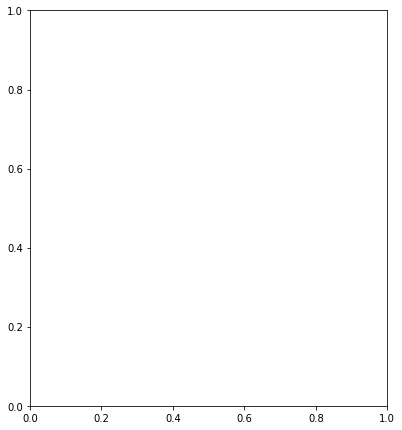

In [52]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5)

plt.subplot(2, 2, 1)
#白黒　対　赤青
X_mans(0, 3, 1, 2)
colors_pattern(0, 3, 1, 2)
show_contour_logistic4(W)

plt.subplot(2, 2, 3)
#白　対　黒
X_man(0, 3)
color_pattern(0, 3)
show_contour_logistic4(W)

plt.subplot(2, 2, 4)
#赤　対　青
X_man(1, 2)
color_pattern(1, 2)
show_contour_logistic4(W)

plt.show()

In [ ]:
def colors_pattern_2(x0, x1, y0, y1):
    for i in range(50):
        if T4[i][0] == 1:
            plt.plot(A[i][x0]-A[i][x1], A[i][y0]-A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='white')
        elif T4[i][1] == 1:
            plt.plot(A[i][x0]-A[i][x1], A[i][y0]-A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='red')
        elif T4[i][2] == 1:
            plt.plot(A[i][x0]-A[i][x1], A[i][y0]-A[i][y1], linestyle='none', markeredgecolor='black', marker='o', color='blue')
        elif T4[i][3] == 1:
            plt.plot(A[i][x0]-A[i][x1], A[i][y0]-A[i][y1], linestyle='none', markeredgecolor='white', marker='o', color='black')

In [ ]:
plt.figure(figsize=(16, 16))

color_pattern_2(3, 0, 1, 2) #x+:b x-:w y+:r y-:b

plt.show()